# Classification Model For Business Use Case
---




#Classification Models with Python

In this notebook, we apply classification algorithms to the [Titanic Dataset](https://www.kaggle.com/c/titanic) to explore survival prediction.

**Objective:**  
Predict whether a passenger survived (`1`) or did not survive (`0`) using available features.

**Models Covered:**
- Logistic Regression  
- Decision Trees  
- Support Vector Machines (SVM)

This notebook serves as a baseline for comparing classification techniques. Future iterations may include additional models for extended evaluation.

Note: Because the main purpose of this project is to learn the code to conduct a data mining project in Python we will use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this notebook.

---

# Imports and Data Load

## 1.1: Import Libraries and Check Working Directory

### Data Dictionary
>- See the following documentation on kaggle for descriptions of the features:
>>- [Titanic Data Dictionary](https://www.kaggle.com/c/titanic/data)

Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sb
import os

Mount Google Drive

In [ ]:
from google.colab import auth

auth.authenticate_user()

Set Working Directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
my_path = '/content/drive/MyDrive/*Advanced Business Analytics'

In [ ]:
os.chdir(my_path)

Load the data

In [ ]:
titanic_data = pd.read_csv('titanic_train.csv')

In [ ]:
tita = pd.DataFrame(titanic_data)

In [ ]:
tita.shape

(891, 12)

In [ ]:
tita.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---

# Exploratory Data Analysis (EDA)

In [ ]:
round(tita.describe().transpose(), 2)

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.00,257.35,1.00,223.50,446.00,668.5,891.00
Survived,891.0,0.38,0.49,0.00,0.00,0.00,1.0,1.00
Pclass,891.0,2.31,0.84,1.00,2.00,3.00,3.0,3.00
Age,714.0,29.70,14.53,0.42,20.12,28.00,38.0,80.00
SibSp,891.0,0.52,1.10,0.00,0.00,0.00,1.0,8.00
Parch,891.0,0.38,0.81,0.00,0.00,0.00,0.0,6.00
Fare,891.0,32.20,49.69,0.00,7.91,14.45,31.0,512.33


## Examine missing data


In [ ]:
tita.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
tita.isnull().sum().sort_values(ascending = False)

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0


In [ ]:
tita_null = tita.isnull()

In [ ]:
tita.count()

,0
PassengerId,891
Survived,891
Pclass,891
Name,891
Sex,891
Age,714
SibSp,891
Parch,891
Ticket,891
Fare,891


In [ ]:
missing = tita.isnull().sum()/891

In [ ]:
round(missing.sort_values(ascending = False), 2)

,0
Cabin,0.77
Age,0.20
Embarked,0.00
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
SibSp,0.00
Parch,0.00


In [ ]:
0.771044+0.198653+0.002245

0.971942

### What's the overall survival distribution?

In [ ]:
tita.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: xlabel='Sex', ylabel='count'>

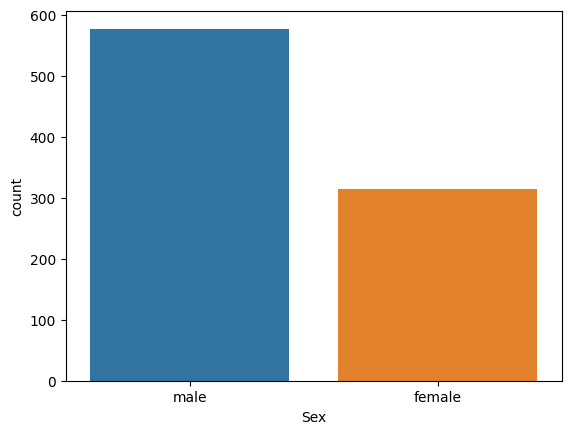

In [ ]:
sb.countplot(tita, x = 'Sex', hue = 'Sex')



```
# This is formatted as code
```

### What's the survival by sex?

In [ ]:
tita.groupby(['Survived', 'Sex']).size()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

In [ ]:
tita.groupby(['Survived', 'Pclass']).size()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64

---

## Data Preparation

Following exploratory data analysis, we address missing values with the following strategies:

1. **`Age`** – Approximately 20% of values are missing. Rather than dropping the column, we will apply an imputation strategy to fill these values.

2. **`Cabin`** – With over 77% of values missing, this feature will be dropped due to insufficient data.

3. **`Embarked`** – Only 2 missing values are present. These rows will be removed from the dataset.




In [ ]:
round(tita.groupby(['Pclass'])['Age'].mean(),0)

,Age
Pclass,
1,38.0
2,30.0
3,25.0


## Visualize the age distribution with boxplots


<Axes: xlabel='Pclass', ylabel='Age'>

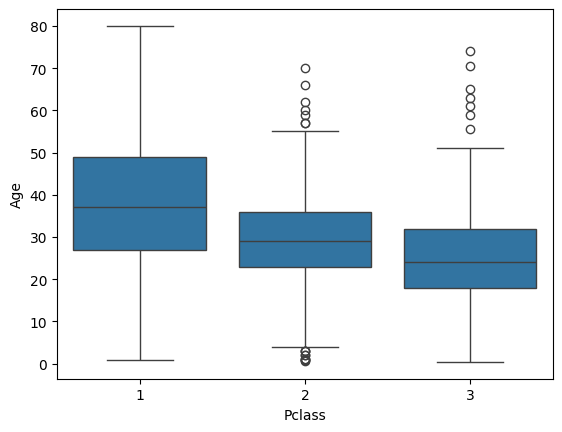

In [ ]:
sb.boxplot(tita, x = 'Pclass', y = 'Age')

In [ ]:
tita['Age_null'] = tita['Age'].isnull().astype(int)

In [ ]:
tita.iloc[17]

,17
PassengerId,18
Survived,1
Pclass,2
Name,"Williams, Mr. Charles Eugene"
Sex,male
Age,NaN
SibSp,0
Parch,0
Ticket,244373
Fare,13.0


In [ ]:
tita['Age']

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [ ]:
tita["Age_null"]

,Age_null
0,0
1,0
2,0
3,0
4,0
...,...
886,0
887,0
888,1
889,0


###Imputing Missing Age Values

To fill in missing values in the `Age` column, we'll define a custom function `impute_age(age, pclass)` that estimates a passenger's age based on their passenger class (`Pclass`).

The assumption is that passenger class correlates with age:  
- Upper class passengers (`Pclass` = 1) are generally older  
- Lower class passengers (`Pclass` = 3) tend to be younger

This approach provides a more informed estimate than using the overall mean or median.


In [ ]:
def impute_age(Age, Pclass):
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

In [ ]:
tita_fake = tita

In [ ]:
tita['Age_Imputed'] = tita.apply(lambda row: impute_age(row['Age'], row['Pclass']), axis=1)

In [ ]:
tita.iloc[17]

,17
PassengerId,18
Survived,1
Pclass,2
Name,"Williams, Mr. Charles Eugene"
Sex,male
Age,NaN
SibSp,0
Parch,0
Ticket,244373
Fare,13.0


## Applying the `impute_age` function



In [ ]:
tita['Age_imputed'] = tita.apply(lambda row: impute_age(row['Age'], row['Pclass']), axis=1)

In [ ]:
tita.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_null',
       'Age_Imputed'],
      dtype='object')

In [ ]:
tita['Age_Imputed']

,Age_Imputed
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,25.0
889,26.0


## Check  missing data again to make sure the function worked


In [ ]:
tita['Age'] = tita['Age_Imputed']

In [ ]:
tita.iloc[17]

,17
PassengerId,18
Survived,1
Pclass,2
Name,"Williams, Mr. Charles Eugene"
Sex,male
Age,30.0
SibSp,0
Parch,0
Ticket,244373
Fare,13.0


In [ ]:
tita.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


### Drop the `Cabin` column completely

In [ ]:
tita.drop('Cabin', axis = 1, inplace = True)

### Remove the cases that are missing `Embarked` data


In [ ]:
tita.dropna(subset = 'Embarked', inplace = True)

In [ ]:
tita.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
tita.shape

(889, 13)

##Converting Categorical Features

Most machine learning algorithms require numeric input. To handle categorical features, we convert them into dummy (or one-hot encoded) variables.

Using `pandas.get_dummies`, we transform each categorical column into multiple binary columns, each representing a single category.

> Example: The `Sex` feature is converted into two binary columns, such as `Sex_male` and `Sex_female`, where a `1` indicates the presence of that category.

This step ensures that categorical information is appropriately represented in our modeling pipeline.


---

#Columns to end up with PassID, Survived, Pclass, Name, Sex, age, sibsp, parch, ticket, fare, embarked, age_null, female, male, c, q, s

In [ ]:
sex1 = pd.get_dummies(tita['Sex'], prefix = '', prefix_sep = '').astype(int)

In [ ]:
sex1.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
tita = tita.join(sex1)

In [ ]:
tita = tita.drop(columns=['Age_Imputed'])

In [ ]:
tita.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_null,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,1


In [ ]:
embarked1 = pd.get_dummies(tita['Embarked'],prefix = '',prefix_sep = '').astype(int)

In [ ]:
embarked1.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
tita = pd.concat([tita, sex1], axis = 1, join = 'inner')

In [ ]:
tita.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_null,female,male,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,1,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,1,0,1


In [ ]:
tita = pd.concat([tita, embarked1], axis = 1, join = 'inner')

In [ ]:
os.getcwd()

'/content/drive/MyDrive/*Advanced Business Analytics'

## Export `titanic_train` to  working directory



In [ ]:
tita.to_csv('tita_train_clean1.csv')

NameError: name 'tita' is not defined

In [ ]:
tita_tc = pd.read_csv('tita_train_clean1.csv', index_col = 0)

In [ ]:
tita_tc.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Age_null', 'female', 'male',
       'female.1', 'male.1', 'C', 'Q', 'S'],
      dtype='object')

## Model Building

This section focuses on constructing and tuning classification models using the prepared dataset.

**Steps Overview:**
- Import required modules for cross-validation and hyperparameter tuning  
- Define input features (`X`) and target variable (`y`)  
- Split data into training and testing sets  
- Build and train models using:
  - Decision Trees  
  - Logistic Regression  
  - Support Vector Machines (SVM)  
- Use Grid Search with Cross-Validation to identify optimal model parameters



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
tita_tc.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Age_null', 'female', 'male',
       'female.1', 'male.1', 'C', 'Q', 'S'],
      dtype='object')

In [ ]:
x = tita_tc.drop(columns = ['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Embarked', 'Age_null'])

x = x.drop(columns= ['male.1', 'female.1'])

y = tita_tc['Survived']

In [ ]:
x = x.drop(columns= ['male.1', 'female.1'])

KeyError: "['male.1', 'female.1'] not found in axis"

In [ ]:
x.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male', 'C', 'Q',
       'S'],
      dtype='object')

In [ ]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 101)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((622, 10), (267, 10), (622,), (267,))

In [ ]:
x.dtypes

,0
Pclass,int64
Age,float64
SibSp,int64
Parch,int64
Fare,float64
female,int64
male,int64
C,int64
Q,int64
S,int64


In [ ]:
x.iloc[17]

,17
Pclass,2.0
Age,30.0
SibSp,0.0
Parch,0.0
Fare,13.0
female,0.0
male,1.0
C,0.0
Q,0.0
S,1.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [ ]:
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
treemodel = DecisionTreeClassifier(random_state=42)
logmodel = LogisticRegression(random_state=42)
svcmodel = SVC(random_state=42)

In [ ]:
treemodel.fit(x_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
logmodel.fit(x_train_scaled, y_train)

LogisticRegression(random_state=42)

In [ ]:
svcmodel.fit(x_train_scaled, y_train)

SVC(random_state=42)

## Make Predictions

In [ ]:
tree_pred = treemodel.predict(x_test_scaled)

In [ ]:
log_pred = logmodel.predict(x_test_scaled)

In [ ]:
svc_pred = svcmodel.predict(x_test_scaled)

In [ ]:
log_prob = logmodel.predict_proba(x_test_scaled)

In [ ]:
log_prob

array([[0.89625365, 0.10374635],
       [0.87690385, 0.12309615],
       [0.22825031, 0.77174969],
       [0.0717538 , 0.9282462 ],
       [0.87568467, 0.12431533],
       [0.96841714, 0.03158286],
       [0.88953204, 0.11046796],
       [0.77585917, 0.22414083],
       [0.92901196, 0.07098804],
       [0.40279946, 0.59720054],
       [0.20491491, 0.79508509],
       [0.04072911, 0.95927089],
       [0.89627446, 0.10372554],
       [0.38348029, 0.61651971],
       [0.89605783, 0.10394217],
       [0.87532565, 0.12467435],
       [0.08008341, 0.91991659],
       [0.15617576, 0.84382424],
       [0.43965131, 0.56034869],
       [0.90374666, 0.09625334],
       [0.89617098, 0.10382902],
       [0.91610253, 0.08389747],
       [0.59993833, 0.40006167],
       [0.68484066, 0.31515934],
       [0.94803724, 0.05196276],
       [0.54869321, 0.45130679],
       [0.35701935, 0.64298065],
       [0.5005738 , 0.4994262 ],
       [0.88515005, 0.11484995],
       [0.68749955, 0.31250045],
       [0.

In [ ]:
log_pro_df = pd.DataFrame(log_prob, columns = ['Died_proba', 'Live_proba'], index = x_test.index )

In [ ]:
log_pro_df.head()

,Died_proba,Live_proba
511,0.896254,0.103746
613,0.876904,0.123096
615,0.228250,0.771750
337,0.071754,0.928246
718,0.875685,0.124315


In [ ]:
round(log_pro_df, 2)

,Died_proba,Live_proba
511,0.90,0.10
613,0.88,0.12
615,0.23,0.77
337,0.07,0.93
718,0.88,0.12
...,...,...
792,0.84,0.16
828,0.88,0.12
732,0.78,0.22
669,0.13,0.87


In [ ]:
x_test = x_test.drop(columns = ['Died_proba', 'Live_proba'])

KeyError: "['Died_proba', 'Live_proba'] not found in axis"

In [ ]:
x_test = x_test.join(log_pro_df)

In [ ]:
x_test.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,Died_proba,Live_proba
511,3,25.0,0,0,8.05,0,1,0,0,1,0.896254,0.103746
613,3,25.0,0,0,7.75,0,1,0,1,0,0.876904,0.123096
615,2,24.0,1,2,65.00,1,0,0,0,1,0.228250,0.771750
337,1,41.0,0,0,134.50,1,0,1,0,0,0.071754,0.928246
718,3,25.0,0,0,15.50,0,1,0,1,0,0.875685,0.124315


### Cross-Val Scores

>- Using a 10-fold cross validation and store the scores for each model in the variables.

In [ ]:
tree_cv_scores = cross_val_score(treemodel, x_train_scaled, y_train, cv = 10)

tree_cv_scores

array([0.80952381, 0.65079365, 0.80645161, 0.82258065, 0.72580645,
       0.79032258, 0.67741935, 0.85483871, 0.82258065, 0.85483871])

In [ ]:
log_cv_scores = cross_val_score(logmodel, x_train_scaled, y_train, cv = 10)

log_cv_scores

array([0.74603175, 0.66666667, 0.79032258, 0.87096774, 0.80645161,
       0.77419355, 0.82258065, 0.79032258, 0.91935484, 0.75806452])

In [ ]:
svc_cv_scores = cross_val_score(svcmodel, x_train_scaled, y_train, cv = 10)

svc_cv_scores

array([0.79365079, 0.74603175, 0.80645161, 0.88709677, 0.82258065,
       0.77419355, 0.82258065, 0.83870968, 0.88709677, 0.75806452])

In [ ]:
#Tree model
round(tree_cv_scores.mean(), 2), round(tree_cv_scores.std(), 2)

(0.78, 0.07)

In [ ]:
#Logistic Reg Model
round(log_cv_scores.mean(), 2), round(log_cv_scores.std(), 2)

(0.79, 0.07)

In [ ]:
#Support Vector Model
round(svc_cv_scores.mean(), 2), round(svc_cv_scores.std(), 2)

(0.81, 0.05)

Tree Model Generalization Accuracy

In [ ]:
round(treemodel.score(x_test_scaled, y_test),2)

0.78

Logistic Regression Generalization Accuracy

In [ ]:
round(logmodel.score(x_test_scaled, y_test),2)

0.83

Suppor Vector Machine Accuracy

In [ ]:
round(svcmodel.score(x_test_scaled, y_test),2)

0.84

##Model Evaluation

This section focuses on assessing model performance using key classification metrics.

**Evaluation Tools:**
- `confusion_matrix`: Displays true positives, false positives, true negatives, and false negatives  
- `classification_report`: Provides precision, recall, F1-score, and support for each class

These metrics offer deeper insight into model accuracy and its effectiveness in handling class imbalances.


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
tree_pred.sum()

97

In [ ]:
tree_cm = confusion_matrix(y_test, tree_pred)

tree_cm_df = pd.DataFrame(tree_cm, columns = ['pred_died', 'pred_live'])

tree_cm_df['Column Total'] = tree_cm_df.sum(axis = 1)

tree_cm_df.loc['Row Total'] = tree_cm_df.sum(axis = 0)

tree_cm_df

,pred_died,pred_live,Column Total
0,137,26,163
1,33,71,104
Row Total,170,97,267


In [ ]:
log_pred.sum()

84

In [ ]:
log_cm = confusion_matrix(y_test, log_pred)

log_cm_df = pd.DataFrame(log_cm, columns = ['pred_died', 'pred_live'])

log_cm_df['Column Total'] = log_cm_df.sum(axis = 1)

log_cm_df.loc['Row Total'] = log_cm_df.sum(axis = 0)

log_cm_df

,pred_died,pred_live,Column Total
0,150,13,163
1,33,71,104
Row Total,183,84,267


In [ ]:
svc_pred.sum()

76

In [ ]:
svc_cm = confusion_matrix(y_test, svc_pred)

svc_cm_df = pd.DataFrame(svc_cm, columns = ['pred_died', 'pred_live'])

svc_cm_df['Column Total'] = svc_cm_df.sum(axis = 1)

svc_cm_df.loc['Row Total'] = svc_cm_df.sum(axis = 0)

svc_cm_df

,pred_died,pred_live,Column Total
0,156,7,163
1,35,69,104
Row Total,191,76,267


In [ ]:
tree_cr = classification_report(y_test, tree_pred, output_dict = True)
tree_cr_df = pd.DataFrame(tree_cr)
round(tree_cr_df.transpose(), 2)

,precision,recall,f1-score,support
0,0.81,0.84,0.82,163.00
1,0.73,0.68,0.71,104.00
accuracy,0.78,0.78,0.78,0.78
macro avg,0.77,0.76,0.76,267.00
weighted avg,0.78,0.78,0.78,267.00


In [ ]:
log_cr = classification_report(y_test, log_pred, output_dict = True)
log_cr_df = pd.DataFrame(log_cr)
round(log_cr_df.transpose(), 2)

,precision,recall,f1-score,support
0,0.82,0.92,0.87,163.00
1,0.85,0.68,0.76,104.00
accuracy,0.83,0.83,0.83,0.83
macro avg,0.83,0.80,0.81,267.00
weighted avg,0.83,0.83,0.82,267.00


In [ ]:
svc_cr = classification_report(y_test, svc_pred, output_dict = True)
svc_cr_df = pd.DataFrame(svc_cr)
round(svc_cr_df.transpose(), 2)

,precision,recall,f1-score,support
0,0.82,0.96,0.88,163.00
1,0.91,0.66,0.77,104.00
accuracy,0.84,0.84,0.84,0.84
macro avg,0.86,0.81,0.82,267.00
weighted avg,0.85,0.84,0.84,267.00




```
# This is formatted as code
```

# Feature Importance


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

tree_model2 = DecisionTreeClassifier(random_state=101)
tree_model2.fit(x_train, y_train)


DecisionTreeClassifier(random_state=101)

In [ ]:
import pandas as pd

importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': tree_model2.feature_importances_
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
importance_df

,Feature,Importance
5,female,0.299089
1,Age,0.262423
4,Fare,0.223172
0,Pclass,0.095283
2,SibSp,0.056935
3,Parch,0.036625
7,C,0.017339
9,S,0.009134
6,male,0.000000
8,Q,0.000000


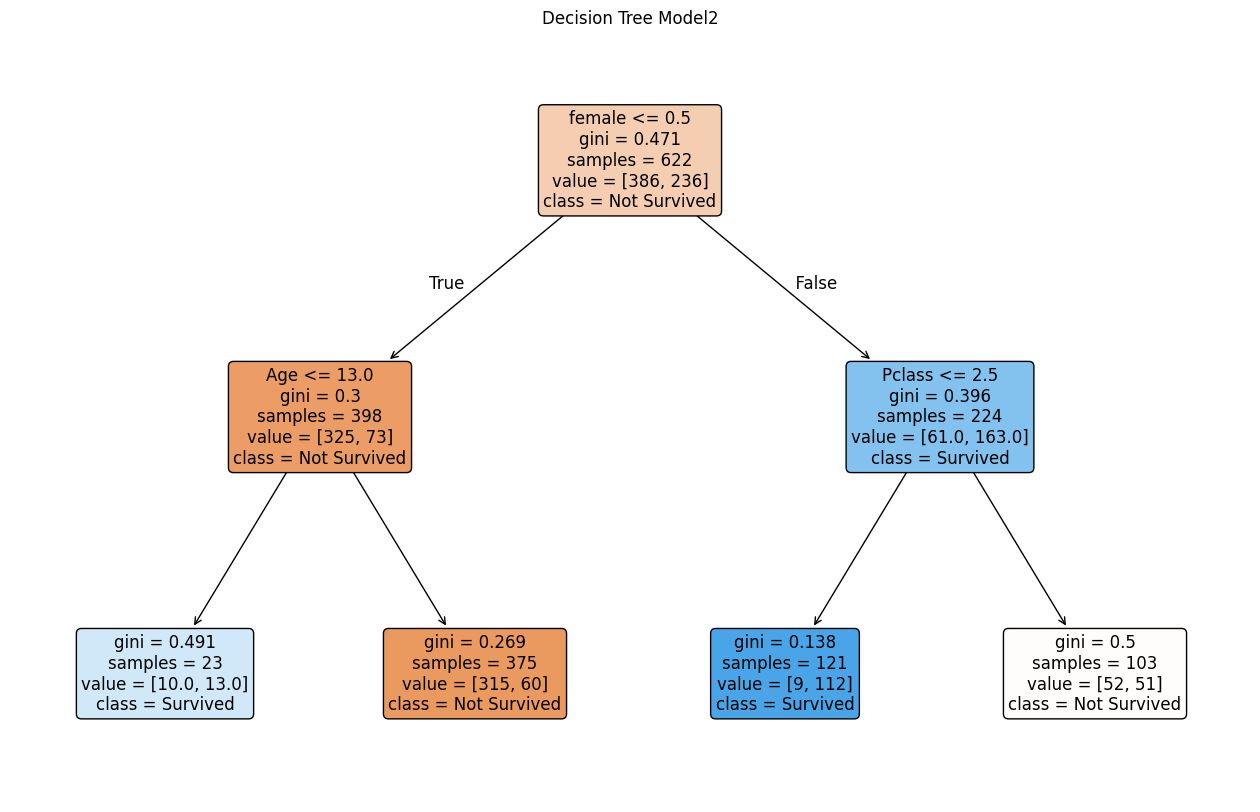

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_model2 = DecisionTreeClassifier(max_depth = 2, random_state=101)
tree_model2.fit(x_train, y_train)

plt.figure(figsize = (16,10))
plot_tree(tree_model2,
          feature_names = x_train.columns,
          class_names = ['Not Survived', 'Survived'],
          filled = True, rounded = True, fontsize = 12)

plt.title('Decision Tree Model2')
plt.show()